In [ ]:
# imports
import pandas as pd

from fraud import Fraud
from fraud import  left_join_on, add_invoice_frequency_features, add_counter_statue_error_occured_features
from fraud import add_counter_regions_features, add_region_fraud_rate_features
from fraud import add_median_billing_frequence_per_region, add_sdt_dev_consumption_region

[MK_notes_columns.md](./doc/MK_notes_columns.md)

### Consumption 

In [ ]:
fraud = Fraud(["./data/train/client_train.csv", "./data/train/invoice_train.csv"], target_column="target")
client  = fraud["./data/train/client_train.csv"]
invoice = fraud["./data/train/invoice_train.csv"]
fraud_merged = left_join_on("client_id", client, invoice)




client.head()

/Users/muri/education/spiced/WaterMLOps/ds-mlproject-fraud/w1_feature_fraud_mk.py:55: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  self._frames[str(p)] = pd.read_csv(p)


,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [3]:
df_fraud_aggregated = fraud.get_target()

In [4]:
df_fraud_aggregated.dtypes

client_id     object
target       float64
dtype: object

In [5]:
df_fraud_aggregated.head()

,client_id,target
0,train_Client_0,0.0
1,train_Client_1,0.0
2,train_Client_10,0.0
3,train_Client_100,0.0
4,train_Client_1000,0.0


In [6]:
invoice.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [7]:
df_fraud_aggregated = add_invoice_frequency_features(fraud_merged, df_fraud_aggregated)

In [8]:
df_fraud_aggregated.head()

,client_id,target,f_invoive_date_diff_days,f_invoive_date_median_months,f_invoive_date_median_years
0,train_Client_0,0.0,120.5,3.958607,0.329911
1,train_Client_1,0.0,121.5,3.991459,0.332649
2,train_Client_10,0.0,147.0,4.829172,0.402464
3,train_Client_100,0.0,121.0,3.975033,0.331280
4,train_Client_1000,0.0,124.0,4.073587,0.339493


In [9]:
fraud_merged['counter_statue'].value_counts()


counter_statue
0         4346960
1           73496
0           32048
5           20495
4            2706
1             540
3             258
5             144
2              32
4              23
46             14
A              13
618            12
769             6
269375          1
420             1
Name: count, dtype: int64

<Axes: title={'center': 'Counter Statue Distribution'}, xlabel='counter_statue'>

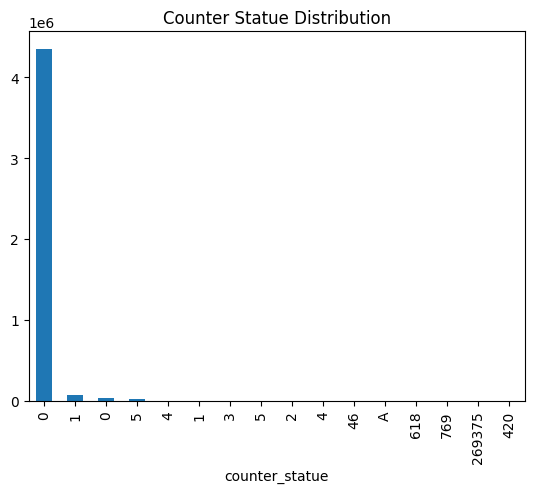

In [10]:
fraud_merged['counter_statue'].value_counts().plot(kind='bar', title='Counter Statue Distribution')

In [11]:
df_fraud_aggregated = add_counter_statue_error_occured_features(fraud_merged, df_fraud_aggregated)

In [12]:
df_fraud_aggregated.dtypes

client_id                          object
target                            float64
f_invoive_date_diff_days          float64
f_invoive_date_median_months      float64
f_invoive_date_median_years       float64
f_counter_statue_error_occured      int64
dtype: object

In [13]:
print(df_fraud_aggregated['f_counter_statue_error_occured'].value_counts())

f_counter_statue_error_occured
0    91457
1    44036
Name: count, dtype: int64


In [14]:
df_fraud_aggregated = add_counter_regions_features(fraud_merged, df_fraud_aggregated)

In [15]:
df_fraud_aggregated.dtypes

client_id                          object
target                            float64
f_invoive_date_diff_days          float64
f_invoive_date_median_months      float64
f_invoive_date_median_years       float64
f_counter_statue_error_occured      int64
f_counter_regions                   int64
dtype: object

In [16]:
print(df_fraud_aggregated['f_counter_regions'].value_counts())

f_counter_regions
0    135493
Name: count, dtype: int64


In [17]:
df_fraud_aggregated = add_region_fraud_rate_features(fraud_merged, df_fraud_aggregated)

In [18]:
df_fraud_aggregated.dtypes

client_id                          object
target                            float64
f_invoive_date_diff_days          float64
f_invoive_date_median_months      float64
f_invoive_date_median_years       float64
f_counter_statue_error_occured      int64
f_counter_regions                   int64
f_region_fraud_rate               float64
dtype: object

In [19]:
print(df_fraud_aggregated['f_region_fraud_rate'].value_counts())

f_region_fraud_rate
0.048237    33770
0.079970    12865
0.113643    12406
0.087543     9998
0.044247     9544
0.144614     8964
0.072045     6044
0.083856     5982
0.073564     4851
0.068516     4379
0.082663     4311
0.092065     3828
0.060209     3669
0.087968     3376
0.080720     2716
0.101760     2076
0.107391     2065
0.075455     1645
0.099969      841
0.096770      706
0.143067      644
0.101396      583
0.021073      175
0.040837       53
0.000000        2
Name: count, dtype: int64


In [20]:
df_fraud_aggregated.head()

,client_id,target,f_invoive_date_diff_days,f_invoive_date_median_months,f_invoive_date_median_years,f_counter_statue_error_occured,f_counter_regions,f_region_fraud_rate
0,train_Client_0,0.0,120.5,3.958607,0.329911,0,0,0.048237
1,train_Client_1,0.0,121.5,3.991459,0.332649,0,0,0.087543
2,train_Client_10,0.0,147.0,4.829172,0.402464,0,0,0.044247
3,train_Client_100,0.0,121.0,3.975033,0.331280,0,0,0.075455
4,train_Client_1000,0.0,124.0,4.073587,0.339493,0,0,0.083856


In [21]:
client.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [22]:
df_fraud_aggregated = add_median_billing_frequence_per_region(fraud_merged, df_fraud_aggregated)

In [23]:
df_fraud_aggregated.dtypes

client_id                                 object
target                                   float64
f_invoive_date_diff_days                 float64
f_invoive_date_median_months             float64
f_invoive_date_median_years              float64
f_counter_statue_error_occured             int64
f_counter_regions                          int64
f_region_fraud_rate                      float64
f_region_median_billing_frequence_per    float64
dtype: object

In [24]:
df_fraud_aggregated.head()

,client_id,target,f_invoive_date_diff_days,f_invoive_date_median_months,f_invoive_date_median_years,f_counter_statue_error_occured,f_counter_regions,f_region_fraud_rate,f_region_median_billing_frequence_per
0,train_Client_0,0.0,120.5,3.958607,0.329911,0,0,0.048237,93.0
1,train_Client_1,0.0,121.5,3.991459,0.332649,0,0,0.087543,84.0
2,train_Client_10,0.0,147.0,4.829172,0.402464,0,0,0.044247,96.0
3,train_Client_100,0.0,121.0,3.975033,0.331280,0,0,0.075455,57.0
4,train_Client_1000,0.0,124.0,4.073587,0.339493,0,0,0.083856,95.0


In [25]:
df_fraud_aggregated = add_median_billing_frequence_per_region(fraud_merged, df_fraud_aggregated)

In [26]:
df_fraud_aggregated.dtypes

client_id                                   object
target                                     float64
f_invoive_date_diff_days                   float64
f_invoive_date_median_months               float64
f_invoive_date_median_years                float64
f_counter_statue_error_occured               int64
f_counter_regions                            int64
f_region_fraud_rate                        float64
f_region_median_billing_frequence_per_x    float64
f_region_median_billing_frequence_per_y    float64
dtype: object

In [29]:
df_fraud_aggregated = add_sdt_dev_consumption_region(fraud_merged, df_fraud_aggregated, postfix_consumption="_level_1")
df_fraud_aggregated = add_sdt_dev_consumption_region(fraud_merged, df_fraud_aggregated, postfix_consumption="_level_2")
df_fraud_aggregated = add_sdt_dev_consumption_region(fraud_merged, df_fraud_aggregated, postfix_consumption="_level_3")
df_fraud_aggregated = add_sdt_dev_consumption_region(fraud_merged, df_fraud_aggregated, postfix_consumption="_level_4")


In [30]:
df_fraud_aggregated.dtypes

client_id                                      object
target                                        float64
f_invoive_date_diff_days                      float64
f_invoive_date_median_months                  float64
f_invoive_date_median_years                   float64
f_counter_statue_error_occured                  int64
f_counter_regions                               int64
f_region_fraud_rate                           float64
f_region_median_billing_frequence_per_x       float64
f_region_median_billing_frequence_per_y       float64
f_region_std_deviation_consumption_level_1    float64
f_region_std_deviation_consumption_level_2    float64
f_region_std_deviation_consumption_level_3    float64
f_region_std_deviation_consumption_level_4    float64
dtype: object

In [31]:
df_fraud_aggregated.head()

,client_id,target,f_invoive_date_diff_days,f_invoive_date_median_months,f_invoive_date_median_years,f_counter_statue_error_occured,f_counter_regions,f_region_fraud_rate,f_region_median_billing_frequence_per_x,f_region_median_billing_frequence_per_y,f_region_std_deviation_consumption_level_1,f_region_std_deviation_consumption_level_2,f_region_std_deviation_consumption_level_3,f_region_std_deviation_consumption_level_4
0,train_Client_0,0.0,120.5,3.958607,0.329911,0,0,0.048237,93.0,93.0,616.717210,2003.479674,222.937490,1093.990742
1,train_Client_1,0.0,121.5,3.991459,0.332649,0,0,0.087543,84.0,84.0,452.375127,1877.001654,132.705638,562.291582
2,train_Client_10,0.0,147.0,4.829172,0.402464,0,0,0.044247,96.0,96.0,449.167480,532.622846,101.017420,472.912852
3,train_Client_100,0.0,121.0,3.975033,0.331280,0,0,0.075455,57.0,57.0,589.000150,830.326107,144.135304,692.619968
4,train_Client_1000,0.0,124.0,4.073587,0.339493,0,0,0.083856,95.0,95.0,455.331350,572.096911,108.254194,504.796898
